In [2]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

정규방정식(normal equation)
- 비용함수를 최소화하는 $\theta$값을 찾기 위한 해석적인 방법

$$
\hat{\theta} = \left({X}^TX\right)^{-1}{X}^T{\mathbf{y}}
$$

In [3]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

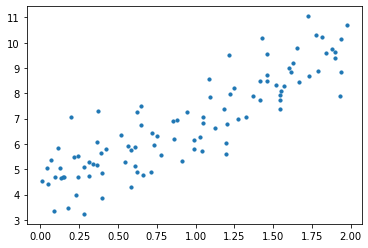

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X, y, s=10)

In [5]:
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1을 추가합니다
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가합니다
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

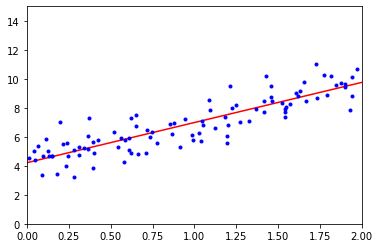

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [9]:
## 사이킷런을 이용한 선형 회귀

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [10]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [11]:
## scipy.linalg.lstsq() 함수(최소 제곱)를 이용

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [12]:
## 유사역행렬(무어펜로즈 역행렬)

np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

경사 하강법(Gradient Descent, GD)

In [13]:
eta = 0.1  # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)  # 무작위 초기화

for iterations in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [14]:
theta

array([[4.21509616],
       [2.77011339]])

In [15]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")  # 훈련 세트 산점도

    n_iterations = 1000
    for iteration in range(n_iterations):

        # 초반 10번 선형 모델(직선) 그리기
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)

        # 파라미터 조정
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients

        # 조정되는 파라미터를 모두 리스트에 저장
        if theta_path is not None:
            theta_path.append(theta)
    
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta={}$".format(eta), fontsize=16)

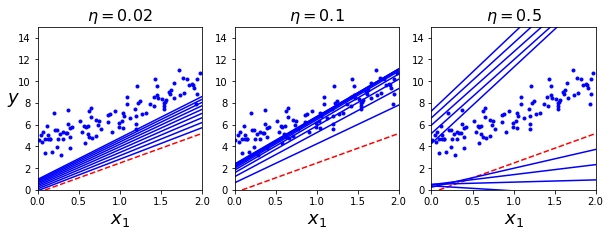

In [16]:
theta = np.random.randn(2, 1)

plt.figure(figsize=(10, 3))

# eta=0.02
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)

# eta=0.01
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)

# eta=0.5
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

In [36]:
## 학습 스케줄을 활용한 확률적 경사 하강법
# 처음에는 학습률을 크게 하고 점점 작게 줄여서 최솟값에 도달할 수 있게 하는 알고리즘

import numpy as np
np.random.seed(42)

theta_path_sgd = []

n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)  # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 



In [37]:
theta

array([[4.21076011],
       [2.74856079]])

In [38]:
## SGD 방식으로 선형회귀 수행

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [41]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.19984658]), array([2.73198364]))

In [42]:
## 미니배치 경사 하강법

theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2, 1)

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

# 학습 스케줄이 사용된 미니배치 수 t에 의존한다.

t = 0

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)  # 에포크가 바뀔 때마다 훈련 데이터 섞기
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]

    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta

array([[4.25214635],
       [2.7896408 ]])

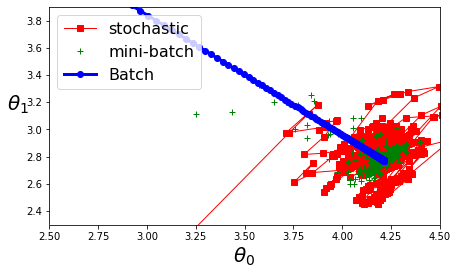

In [44]:
## 배치/확률적/미니배치 경사 하강법 파라미터 학습과정 비교

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g+", linewidth=2, label="mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$  ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

다항 회귀(Polynomial Regression)

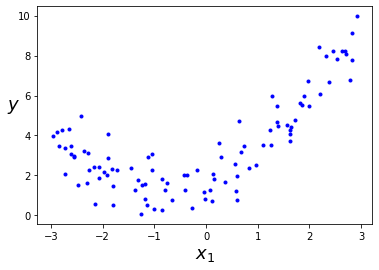

In [48]:
np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)  # 잡음을 포함

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

In [49]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [53]:
## X_poly는 원래 특성 X와 이 특성의 제곱을 포함한다.
X_poly[0]

array([-0.75275929,  0.56664654])

In [54]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

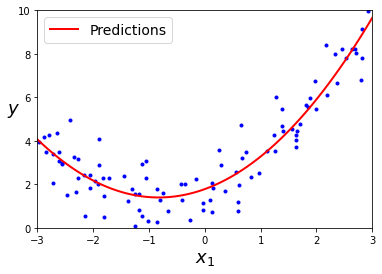

In [61]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1) # 새로운 샘플 100개
X_new_poly = poly_features.transform(X_new)     # 2차 다항 회귀 모델 데이터로 변환
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

학습 곡선

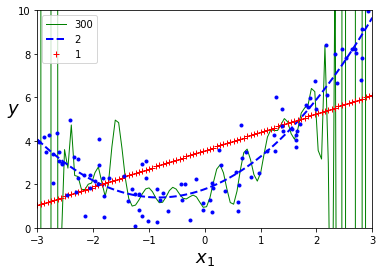

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 세 개의 다항회귀 모델 지정: 차례대로 300차, 2차 다항, 1차 선형 회귀 모델의 예측값 그래프
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r+", 2, 1)):

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()

    polynomial_regression = Pipeline([  # 파이프라인: 전처리 + 선형회귀 모델
        ("poly_features", polybig_features),
        ("std_sclaer", std_scaler),
        ("lin_reg", lin_reg),
    ])

    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)

    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [88]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []

    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)

        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validation set")
    plt.legend(loc="upper right", fontsize=14)  
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)   

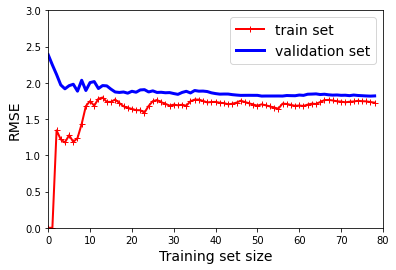

In [90]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                        
plt.show()

## 과소적합 모델의 학습 곡선

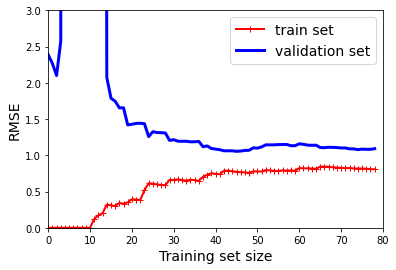

In [91]:
## 과대적합 모델의 학습 곡선

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("len_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

규제가 있는 선형 모델

In [3]:
np.random.seed(42)

m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5   # 1차 선형회귀 모델을 따르도록 함, 잡음 추가
X_new = np.linspace(0, 3, 100).reshape(100, 1)  # 검증 데이터 선택

In [7]:
from sklearn.linear_model import Ridge
# alpha는 규제 강도(값이 클수록 규제가 세짐)
# 원래는 경사하강법, 하지만 solver=cholesky를 지정하면 정규방정식 이용하여 파라미터 계산
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [8]:
# 경사하강법을 지원하는 옵티마이저 중 하나
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

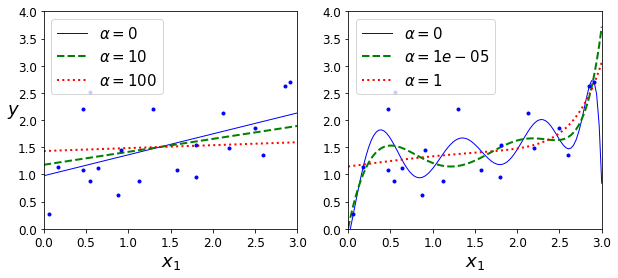

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model),
            ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(10, 4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

In [26]:
# 확률적 경사 하강법을 사용
'''
l2는 SGD가 비용 함수에 가중치 벡터의 l2 노름의 제곱을 2로 나눈 규제항을 추가하게 만든다.
즉, 릿지 회귀와 같다.
'''
from sklearn.linear_model import SGDRegressor
np.random.seed(42)
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

In [18]:
# 도표에 사용되는 좌표값 모음
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

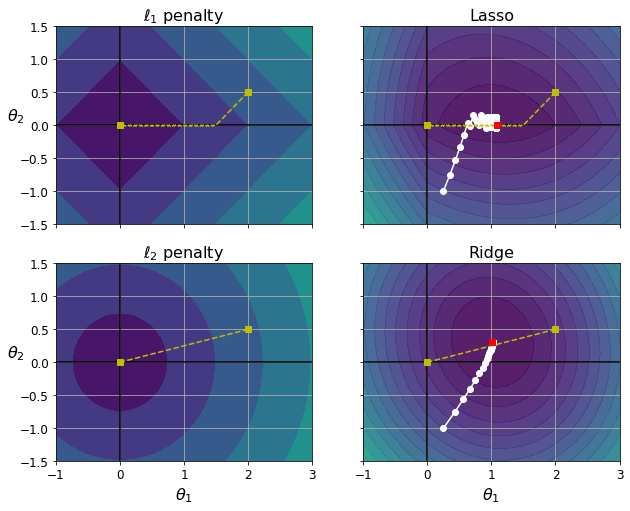

In [20]:
# 파라미터(theta) 경로 기억 어레이 생성 함수
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]
    
    # 좌측 도표 등고선 용도
    levelsN=np.linspace(0, np.max(N), 10)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    
    # 라쏘 또는 릿지 회귀 경사하강법 파라미터 경로
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    
    # l1 노름 또는 l2 노름 경사하강법 경로
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)
    
    # 좌측 도표(상단: 라쏘, 하단: 릿지)
    ax = axes[i, 0] 
    ax.grid(True)
    ax.axhline(y=0, color='k')                                     # x 축
    ax.axvline(x=0, color='k')                                     # y 축
    ax.contourf(t1, t2, N / 2., levels=levelsN)                    # 등고선
    
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")                     # 노랑 점선
    ax.plot(0, 0, "ys")                                            # 원점
    ax.plot(t1_min, t2_min, "ys")                                  # 좌표 (2, 1)
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    # 우측 도표(상단: 라쏘, 하단: 릿지)
    ax = axes[i, 1]   
    ax.grid(True)
    ax.axhline(y=0, color='k')                                      # x 축
    ax.axvline(x=0, color='k')                                      # y 축
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)             # 등고선
    
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")                    # 흰색 점실선
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")                      # 노랑 점선
    ax.plot(0, 0, "ys")                                             # 원점
    ax.plot(t1_min, t2_min, "ys")                                   # 좌표 (2, 1)
    ax.plot(t1r_min, t2r_min, "rs")                                 # 빨강 점
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)

plt.show()

In [23]:
'''
Lasso 규제는 덜 중요한 특성의 가중치를 제거하려고 한다. 
즉, 라쏘 회귀는 자동으로 특성 선택을 하고 희소모델(sparse model)을 만든다.
'''
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [29]:
# 엘라스틱넷(Elastic net)은 릿지와 라쏘 회귀를 절충한 모델
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

In [32]:
# 조기종료
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from copy import deepcopy

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

# 5:5로 훈련/검증 세트로 분할
X_train, X_val, y_train, y_val = train_test_split(
    X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

# 데이터 준비
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# warm_start=True를 지정하면 fit()메서드 호출 시 처음부터 다시 시작하지 않고 이전 모텔 파라미터에서 훈련을 이어감
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

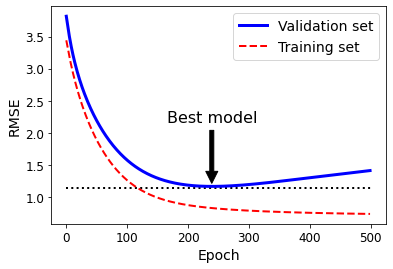

In [36]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500

train_errors, val_errors = [], []                    # 훈련/검증 모델 성능 기록 장치

for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)        # warm_start=True 이기에 학습결과를 이어감.
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))  # 훈련/검증모델 성능 기록
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)                  # 최고 성능의 모델 기억해두기
best_val_rmse = np.sqrt(val_errors[best_epoch])


plt.annotate('Best model',                          
             xy=(best_epoch, best_val_rmse),        
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # 검정 실선을 잘 보여주기 위해서임.
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)  # 수평 검정 점선
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")    # 파랑 실선
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")   # 빨강 파선

# 기타 추가 정보
plt.legend(loc="upper right", fontsize=14)  # 범례
plt.xlabel("Epoch", fontsize=14)            # 축 정보
plt.ylabel("RMSE", fontsize=14)
plt.show()

로지스틱 회귀(Logistic Regression) = 로짓회귀(Logit Regression)

In [37]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [46]:
X = iris["data"][:, 3:]  # 꽃잎의 너비
y = (iris["target"] == 2).astype(int)  # Iris-Virginica면 1, 그렇지 않으면 0

In [39]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

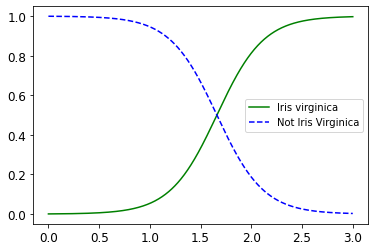

In [42]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris Virginica")
plt.legend()
plt.show()

In [43]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])